In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
!pip install tensorflow matplotlib

# **Required Libraries**

In [48]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset

In [49]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [50]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


***The training set consists of 60,000 28x28 images (`x_train`) with corresponding labels (`y_train`), while the test set has 10,000 28x28 images (`x_test`) and labels (`y_test`).***

***The labels represent digits (0-9) for each image.***

In [51]:
#reshape to match input shape of CNN
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [52]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


# ***Normalization***

In [53]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Visualization

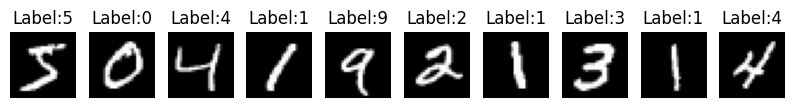

In [55]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
    plt.title(f"Label:{y_train[i]}")
    plt.axis("off")
plt.show()

# Data Augmentation using ImageDataGenerator

In [56]:
data_aug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

In [57]:
data_aug.fit(x_train)

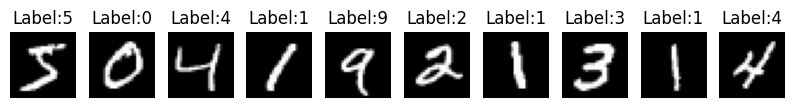

In [58]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
    plt.title(f"Label:{y_train[i]}")
    plt.axis("off")
plt.show()

# CNN model

In [59]:
model = Sequential([
    Input(shape=(28, 28, 1)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
result = model.fit(
    data_aug.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=10
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9874 - loss: 0.0381 - val_accuracy: 0.9933 - val_loss: 0.0196
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9885 - loss: 0.0346 - val_accuracy: 0.9929 - val_loss: 0.0221
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9901 - loss: 0.0340 - val_accuracy: 0.9915 - val_loss: 0.0235
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9900 - loss: 0.0323 - val_accuracy: 0.9924 - val_loss: 0.0238
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9923 - val_loss: 0.0220
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9936 - val_loss: 0.0206
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9916 - loss: 0.0285 - val_accuracy: 0.9929 - val_loss: 0.0198
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9921 - loss: 0.0263 - 

In [63]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0206
Test Loss: 0.0206
Test Accuracy: 0.9936


# Training and validation accuracy graph

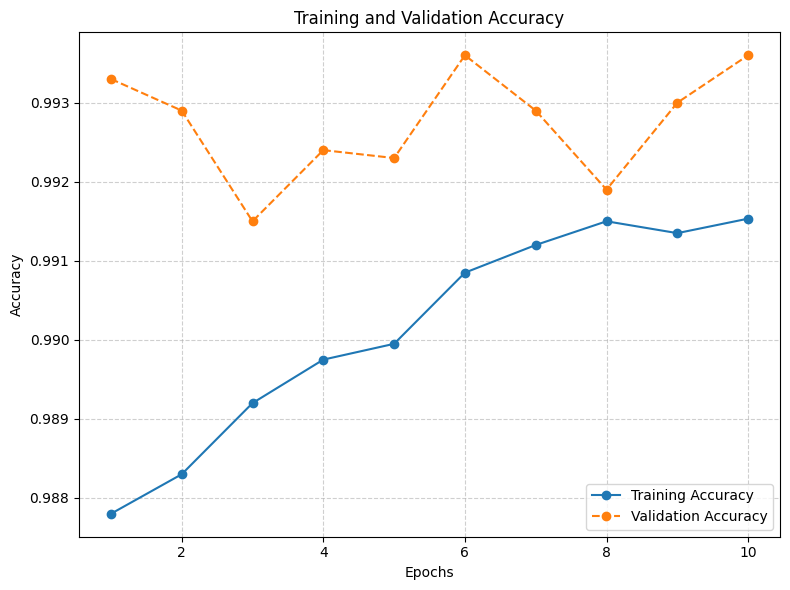

In [64]:
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
epochs_range = range(1, len(accuracy) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Training and validation loss graph

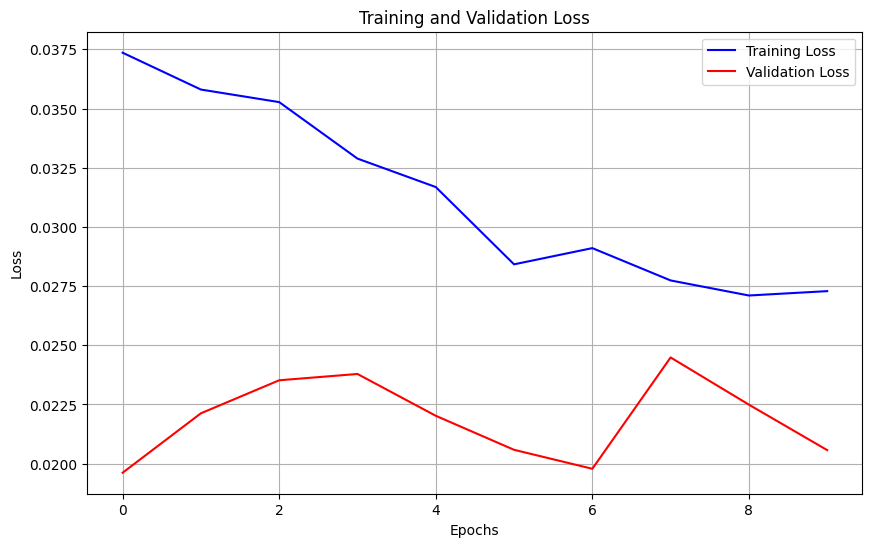

In [65]:
train_loss = result.history['loss']
val_loss = result.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


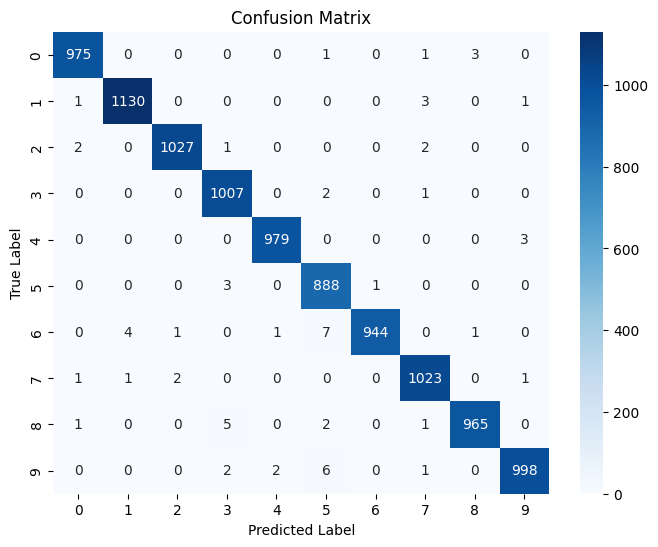

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predictions Visualization

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


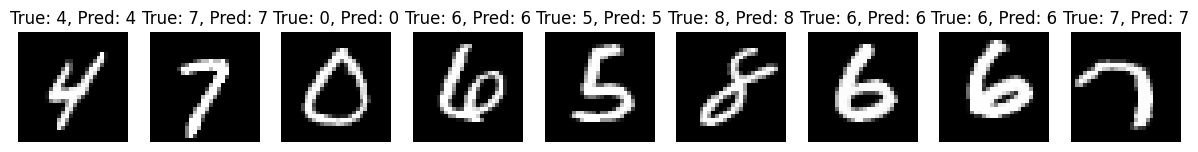

In [76]:
random_idx = np.random.choice(x_test.shape[0], 100)
sample_images = x_test[random_idx]
true_labels = y_test[random_idx]
predicted_labels = model.predict(sample_images).argmax(axis=-1)

plt.figure(figsize=(15, 5))
for i in range(9):
    plt.subplot(1, 9, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()


**Test Accuracy**: 99.36%
- **Training Accuracy**: 99.17%
- **Validation Accuracy**: 99.36%
- **Final Training Loss**: 0.0263
- **Final Validation Loss**: 0.0206
- **Strong performance with minimal overfitting**
- **Effective model for MNIST digit classification**